# `scipy.interpolate`

This module provides general interpolation capability for data in 1, 2, and higher dimensions. This list of features is from the documentation:

  - A class representing an interpolant (interp1d) in 1-D, offering several interpolation methods.

  - Convenience function griddata offering a simple interface to interpolation in N dimensions (N = 1, 2, 3, 4, ...).     Object-oriented interface for the underlying routines is also available.
  
  - Functions for 1- and 2-dimensional (smoothed) cubic-spline interpolation, based on the FORTRAN library FITPACK.       There are both procedural and object-oriented interfaces for the FITPACK library.
  
  - Interpolation using Radial Basis Functions.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## 1D data

In [2]:
from scipy.interpolate import interp1d

In [3]:
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
f = interp1d(x, y, kind='linear') # default if kind=None
f2 = interp1d(x, y, kind='cubic')
f3 = interp1d(x, y, kind='nearest')

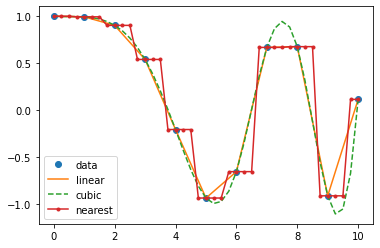

In [4]:
xnew = np.linspace(0, 10, num=41, endpoint=True)
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--', xnew, f3(xnew), '.-')
plt.legend(['data', 'linear', 'cubic', 'nearest'], loc='best')
plt.show()

## nD data

There are fewer approaches to n-dimensional data, the evaluation for arbitrary dimensions is always for points on an n dimensional grid.

In [5]:
from scipy.interpolate import griddata

def func(x, y):
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2

In [6]:
# A regular grid array of x,y coordinates

grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j] # see np.info(np.mgrid) for an explanation of the 200j !!

In [7]:
np.info(np.mgrid)

`nd_grid` instance which returns a dense multi-dimensional "meshgrid".

An instance of `numpy.lib.index_tricks.nd_grid` which returns an dense
(or fleshed out) mesh-grid when indexed, so that each returned argument
has the same shape.  The dimensions and number of the output arrays are
equal to the number of indexing dimensions.  If the step length is not a
complex number, then the stop is not inclusive.

However, if the step length is a **complex number** (e.g. 5j), then
the integer part of its magnitude is interpreted as specifying the
number of points to create between the start and stop values, where
the stop value **is inclusive**.

Returns
-------
mesh-grid `ndarrays` all of the same dimensions

See Also
--------
numpy.lib.index_tricks.nd_grid : class of `ogrid` and `mgrid` objects
ogrid : like mgrid but returns open (not fleshed out) mesh grids
r_ : array concatenator

Examples
--------
>>> np.mgrid[0:5,0:5]
array([[[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 

In [8]:
# A random sampling within the same area

points = np.random.rand(1000, 2)
values = func(points[:,0], points[:,1])

# Resample from the values at these points onto the regular mesh

grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')

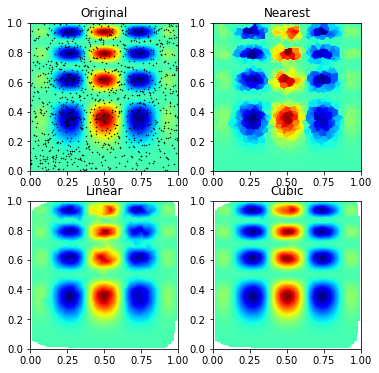

In [9]:
plt.subplot(221)
plt.imshow(func(grid_x, grid_y).T, extent=(0,1,0,1), origin='lower', cmap='jet')
plt.plot(points[:,0], points[:,1], 'k.', ms=1)
plt.title('Original')
plt.subplot(222)
plt.imshow(grid_z0.T, extent=(0,1,0,1), origin='lower', cmap='jet')
plt.title('Nearest')
plt.subplot(223)
plt.imshow(grid_z1.T, extent=(0,1,0,1), origin='lower', cmap='jet')
plt.title('Linear')
plt.subplot(224)
plt.imshow(grid_z2.T, extent=(0,1,0,1), origin='lower', cmap='jet')
plt.title('Cubic')
plt.gcf().set_size_inches(6, 6)
plt.show()

## Splines 

Which have the added benefit of giving smooth derivative information

In [10]:
from scipy.interpolate import splrep, splev

In [11]:
x = np.arange(0, 2*np.pi+np.pi/4, 2*np.pi/8)
y = np.sin(x)
tck = splrep(x, y, s=0)
xnew = np.arange(0, 2*np.pi, np.pi/50)
ynew = splev(xnew, tck, der=0)
yder = splev(xnew, tck, der=1)

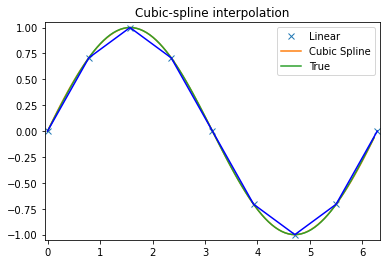

In [12]:
plt.figure()
plt.plot(x, y, 'x', xnew, ynew, xnew, np.sin(xnew), x, y, 'b')
plt.legend(['Linear', 'Cubic Spline', 'True'])
plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('Cubic-spline interpolation')
plt.show()

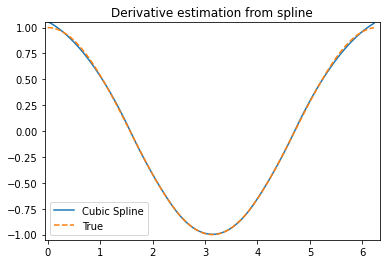

In [13]:
plt.figure()
plt.plot(xnew, yder, xnew, np.cos(xnew),'--')
plt.legend(['Cubic Spline', 'True'])
plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('Derivative estimation from spline')
plt.show()

__2D splines__ are also available

/usr/share/miniconda3/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  if __name__ == '__main__':


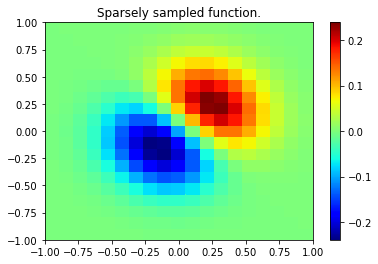

In [14]:
from scipy.interpolate import bisplrep, bisplev

# Gridded function (at low resolution ... doesn't need to be gridded data here)

x, y = np.mgrid[-1:1:20j, -1:1:20j]
z = (x+y) * np.exp(-6.0*(x*x+y*y))

plt.figure()
plt.pcolor(x, y, z, cmap='jet')
plt.colorbar()
plt.title("Sparsely sampled function.")
plt.show()

In [15]:
xnew, ynew = np.mgrid[-1:1:70j, -1:1:70j]

## Create the spline-representation object tck

tck = bisplrep(x, y, z, s=0)
znew = bisplev(xnew[:,0], ynew[0,:], tck)

/usr/share/miniconda3/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


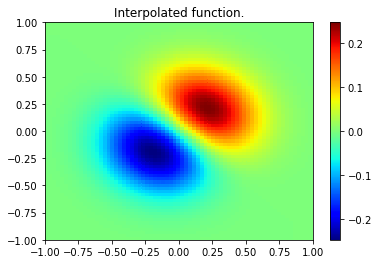

In [16]:
plt.figure()
plt.pcolor(xnew, ynew, znew, cmap='jet')
plt.colorbar()
plt.title("Interpolated function.")
plt.show()

## See also

  - Radial basis function interpolation for scattered data in n dimensions (slow for large numbers of points): `from scipy.interpolate import Rbf`
  - `scipy.ndimage` for fast interpolation operations on image-like arrays
  - B-splines on regular arrays are found in the `scipy.signal` module